In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

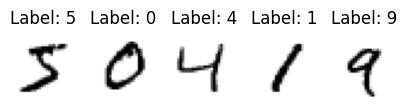

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)) / 255.0

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary')
    ax.set_title('Label: {}'.format(y_train[i]))
    ax.axis('off')
plt.show()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen.fit(x_train)
augmented_img = []
for batch in datagen.flow(x_train, batch_size=len(x_train), shuffle=False):
  augmented_img.append(batch)
  if len(augmented_img) * len(batch) >= len(x_train) * 2:
    break

augmented_img = np.concatenate(augmented_img)
y_train_aug = np.concatenate((y_train, y_train), axis=0)

test_generator = datagen.flow(x_test, y_test, batch_size=32, shuffle=False)

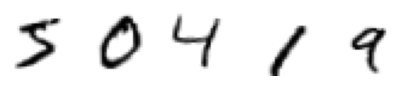

In [ ]:
#print augmented images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_img[i], cmap='binary')
    #ax.set_title('Label: {}'.format(y_train[i]))
    ax.axis('off')
plt.show()

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=128, verbose = 0)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy before augmentation (with normal test data):', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1273 - accuracy: 0.9840
Test accuracy before augmentation (with normal test data): 0.984000027179718


In [ ]:
model.fit(augmented_img, y_train_aug, epochs=50, batch_size=128, verbose = 0)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy After augmentation (with augmented test data):', test_generator)

313/313 [==============================] - 1s 2ms/step - loss: 0.1802 - accuracy: 0.9798
Test accuracy After augmentation : 0.9797999858856201
